In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog
!unzip -q leapgestrecog.zip -d ./leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 97% 2.06G/2.13G [00:25<00:01, 38.3MB/s]
100% 2.13G/2.13G [00:25<00:00, 91.1MB/s]


In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import cv2, os, glob
import numpy as np

dataset_path = "./leapgestrecog/leapGestRecog"
images, labels = [], []

for gesture_dir in sorted(glob.glob(f"{dataset_path}/*/*")):
    class_name = os.path.basename(gesture_dir)
    for img_path in glob.glob(f"{gesture_dir}/*.png"):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(cv2.resize(img, (64, 64)))
            labels.append(class_name)

class_names = sorted(set(labels))
label_to_int = {name: i for i, name in enumerate(class_names)}
labels = np.array([label_to_int[l] for l in labels])
images = np.array(images)

print(f"Total images: {len(images)} | Classes: {class_names}")


✅ Total images: 20000 | Classes: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [ ]:
hog_features = []
for img in images:
    feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(feature)

hog_features = np.array(hog_features)
print("HOG feature vector size:", hog_features.shape)

HOG feature vector size: (20000, 1764)


In [ ]:

X_train_img, X_test_img, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)



In [ ]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=folders))

 Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          00       1.00      1.00      1.00       400
          01       1.00      1.00      1.00       400
          02       1.00      1.00      1.00       400
          03       1.00      1.00      1.00       400
          04       1.00      1.00      1.00       400
          05       1.00      1.00      1.00       400
          06       1.00      1.00      1.00       400
          07       1.00      1.00      1.00       400
          08       1.00      1.00      1.00       400
          09       1.00      1.00      1.00       400

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



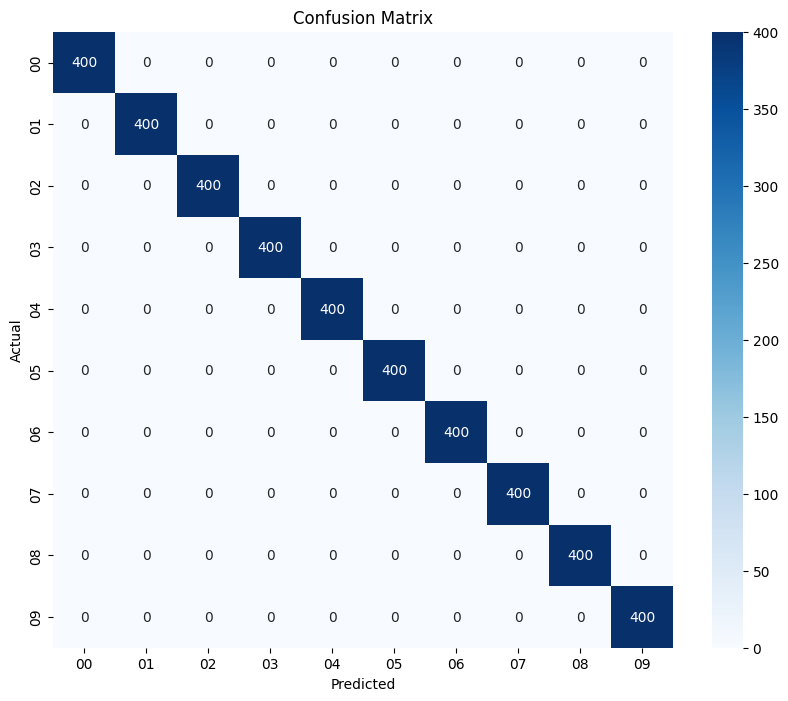

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=folders, yticklabels=folders)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Predicted: 03_fist | Actual: 03_fist


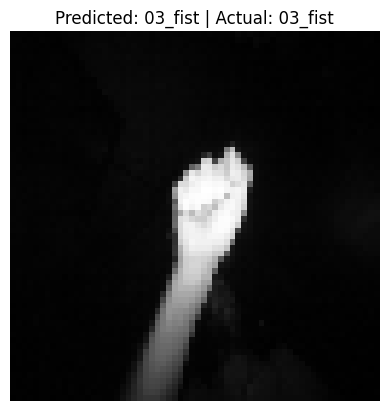

In [ ]:

idx = random.randint(0, len(X_test) - 1)
pred_label = class_names[clf.predict([X_test[idx]])[0]]
true_label = class_names[y_test[idx]]

print(f"Predicted: {pred_label} | Actual: {true_label}")

plt.imshow(X_test_img[idx], cmap='gray')
plt.axis('off')
plt.title(f"Predicted: {pred_label} | Actual: {true_label}")
plt.show()


In [ ]:

import joblib


joblib.dump(clf, "hand_gesture_svm_model.pkl")

print("Model saved as hand_gesture_svm_model.pkl")


Model saved as hand_gesture_svm_model.pkl
